In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
h = 0.5 

def f1(u, v, I):
  return 0.04 * v**2 +5 * v + 140 - u + I

def f2(u, v):
  return a * (b * v - u)


In [4]:
modes = {
          "TS" : [0.02, 0.2, -65, 6],
          "PS" : [0.02, 0.25, -65, 6],
          "C"  : [0.02, 0.2, -50, 2],
          "FS" : [0.1, 0.2, -65, 2]
}

In [5]:
def euler (t_0, t_n, f, h, I=5):
  t_nodes = int((t_n - t_0)/h)
  u = [0 for i in range (t_nodes+1)]
  v = [0 for i in range (t_nodes+1)]
  v[0] = c
  u[0] = b * v[0]
  for i in range (t_nodes):
    v[i+1] = v[i] + h * f[0](u[i], v[i], I)
    u[i+1] = u[i] + h * f[1](u[i], v[i])

    if v[i+1] >= 30:
      v[i+1] = c
      u[i+1] = u[i+1] + d
  return u, v

In [6]:
def implicit_euler(t_0, t_n, f, h, I = 5):
    t_nodes = int((t_n - t_0)/h)
    u = [0 for i in range (t_nodes+1)]
    v = [0 for i in range (t_nodes+1)]

    v[0] = c
    u[0] = b * v[0]

    def mod_v(v_i1, u_i, v_i):
      return v_i1 - v_i - h * f[0](u[i], v[i], I)
    
    def mod_u(u_i1, u_i, v_i):
      return u_i1 - u_i - h * f[1](u[i], v[i])

    for i in range (t_nodes):
      v[i+1] = (optimize.root(mod_v, v[i], args = (u[i], v[i]))).x[0]
      u[i+1] = (optimize.root(mod_u, u[i], args = (u[i], v[i]))).x[0]

      if v[i+1] >= 30:
        v[i+1] = c
        u[i+1] = u[i+1] + d  

    return u, v

In [7]:
def runge_kutta(t_0, t_n, f, h, I = 5):

    t_nodes = int((t_n - t_0)/h)
    u = [0 for i in range (t_nodes+1)]
    v = [0 for i in range (t_nodes+1)]

    v[0] = c
    u[0] = b * v[0]
    for i in range (t_nodes):
      k1_v = h * f[0](u[i], v[i], I)
      k1_u = h * f[1](u[i], v[i])

      k2_v = h * f[0](u[i]+h/2, v[i] + 0.5 * k1_v, I)
      k2_u = h * f[1](u[i]+0.5 * k1_u, v[i] + h/2)

      k3_v = h * f[0](u[i] + h/2, v[i] + 0.5 * k2_v, I)
      k3_u = h * f[1](u[i] + 0.5 * k2_u, v[i] + h/2)

      k4_v = h * f[0](u[i] + h, v[i] + k3_v, I)
      k4_u = h * f[1](u[i] + k3_u, v[i] + h)

      v[i+1] = v[i] + (1/6) * (k1_v + 2* k2_v + 2 * k3_v + k4_v)
      u[i+1] = u[i] + (1/6) * (k1_u + 2* k2_u + 2 * k3_u + k4_u)

      if v[i+1] >= 30:
        v[i+1] = c
        u[i+1] = u[i+1] + d  
  
    return u, v 


In [8]:
t_0 = 0
t_n = 300

t = np.linspace(t_0, t_n, (int((t_n - t_0)/h) +1))

In [ ]:
print(list(modes.keys())[0])

TS


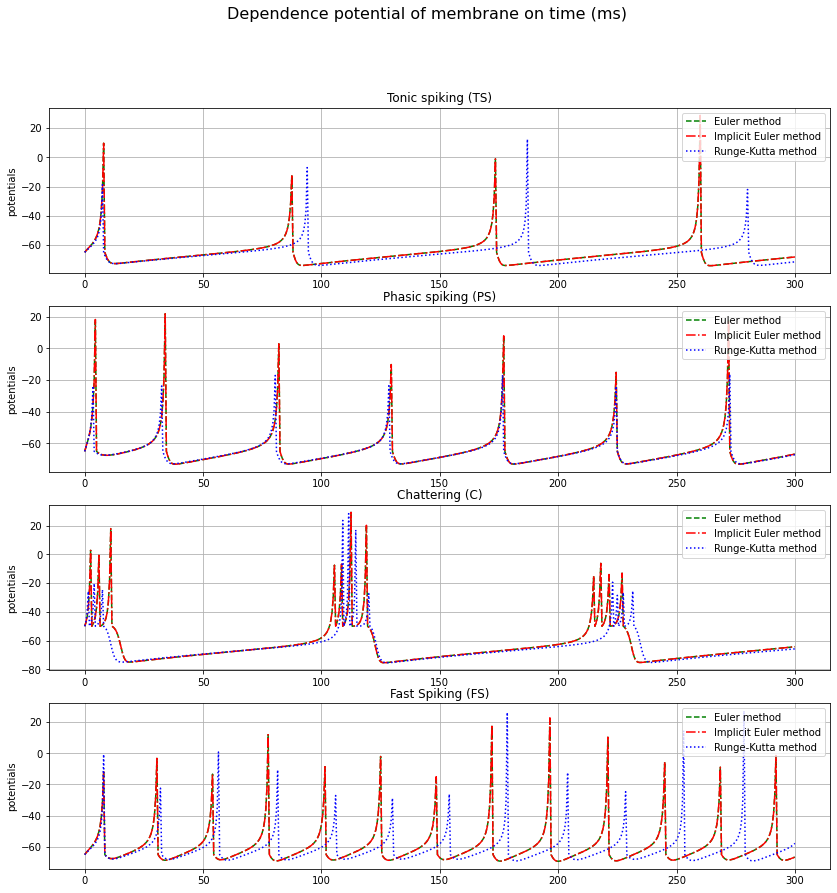

In [40]:
fig, ax = plt.subplots(4, 1 , figsize = (14, 14))
captions = ["Tonic spiking (TS)", "Phasic spiking (PS)", "Chattering (C)", "Fast Spiking (FS)"]
for i in range (0, 4):
  a = modes[list(modes.keys())[i]][0]
  b = modes[list(modes.keys())[i]][1]
  c = modes[list(modes.keys())[i]][2]
  d = modes[list(modes.keys())[i]][3]
  u1, v1 = euler(t_0, t_n, [f1, f2], h)
  u2, v2 = implicit_euler(t_0, t_n, [f1, f2], h)
  u3, v3 = runge_kutta(t_0, t_n, [f1, f2], h)
  ax[i].set_title(captions[i], fontsize = 12)
  ax[i].plot(t, v1, '--g', label = "Euler method", ms = 6 )
  ax[i].plot(t, v2, '-.r', label = "Implicit Euler method", ms = 7)
  ax[i].plot(t, v3, ':b', label = "Runge-Kutta method", ms = 8)
  ax[i].set_ylabel('potentials')
  ax[i].grid()
  ax[i].legend(loc = 'upper right')
fig.suptitle("Dependence potential of membrane on time (ms)", fontsize=16)
plt.show()




In [12]:
def euler (t_0, t_n, f, h, I=5):
  t_nodes = int((t_n - t_0)/h)
  u = [0 for i in range (t_nodes+1)]
  v = [0 for i in range (t_nodes+1)]
  v[0] = c
  u[0] = b * v[0]
  for i in range (t_nodes):
    v[i+1] = v[i] + h * f[0](u[i], v[i], I)
    u[i+1] = u[i] + h * f[1](u[i], v[i])

    if v[i+1] >= 30:
      v[i+1] = c
      u[i+1] = u[i+1] + d
  return u, v

In [13]:
def mod_euler (t_0, t_n, f, h, I):
  t_nodes = int((t_n - t_0)/h)
  v = [0 for i in range (t_nodes+1)]
  u = [0 for i in range (t_nodes+1)]
  v[0] = c
  u[0] = b * v[0]
  for i in range (t_nodes):
    v[i+1] = v[i] + h * f[0](u[i], v[i], I[i])
    u[i+1] = u[i] + h * f[1](u[i], v[i])

    if v[i+1] >= 30:
      v[i+1] = c
      u[i+1] = u[i+1] + d
  return v

In [14]:
W_matrix = np.zeros((1000, 1000))
for i in range (0, 1000):
  for j in range (0,800):
    if i != j:
      W_matrix[i][j] = 0.5 * np.random.uniform()

  for j in range (800, 1000):
    if i != j:
      W_matrix[i][j] = -np.random.uniform()

In [ ]:
print(W_matrix[799][800])

-0.10267429494703839


In [15]:
params_neurons = [{'a' : 0 , 'b' : 0,'c' : 0, 'd' : 0, 'I' : 0, 'id' : 0} for i in range (1000)]
print(params_neurons[1]['a'])

0


In [18]:
id = 1

for i in range (800):
  params_neurons[i]['a'] = 0.02
  params_neurons[i]['b'] = 0.2
  params_neurons[i]['c'] = -65 + 15 * np.random.uniform() ** 2
  params_neurons[i]['d'] = 8 - 6 *  np.random.uniform() ** 2
  params_neurons[i]['I'] = 5 * np.random.uniform() 
  params_neurons[i]['id'] = id
  id += 1

for i in range (800, 1000):
  params_neurons[i]['a'] = 0.02 + 0.08 * np.random.uniform()
  params_neurons[i]['b'] = 0.25 - 0.05 * np.random.uniform()
  params_neurons[i]['c'] = -65 
  params_neurons[i]['d'] = 2 
  params_neurons[i]['I'] = 2 * np.random.uniform() 
  params_neurons[i]['id'] = id
  id += 1

print(id)

1001


In [19]:
t_1 = np.linspace(0, 1000, 21)
t_0_1 = 0
t_n_1 = 1

h1 = (t_n_1-t_0_1)/(len(t_1)-1)


[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


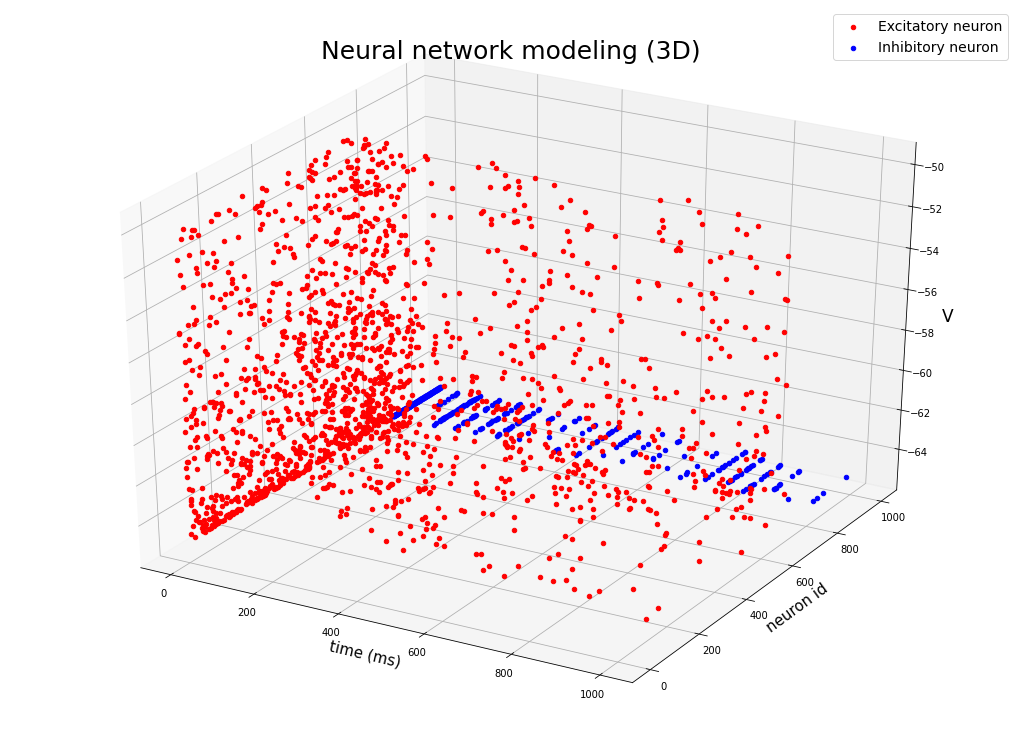

In [25]:
fig = plt.figure(figsize=(14, 10))
ax_3d = Axes3D(fig)
ax_3d.set_xlabel('time (ms)', fontsize = 15)
ax_3d.set_ylabel('neuron id', fontsize = 15)
ax_3d.set_zlabel('V', fontsize = 17)
I = [0 for c  in range (len(t_1))]
increased_current = np.zeros((len(t_1), 1000))
for i in range (0, 1000):
    a = params_neurons[i]['a']
    b = params_neurons[i]['b']
    c = params_neurons[i]['c']
    d = params_neurons[i]['d']
    for k in range (len(t_1)):
      if increased_current[k][i] == 0:
        I[k]  = params_neurons[i]['I']
      else:
        I[k] = increased_current[k][i]
    id = params_neurons[i]['id']
    v = mod_euler(t_0_1, t_n_1, [f1, f2], h1, I)
    for p in range (len(v)):
      if v[p] == c:
        for j in range (1000):
          increased_current[p][j] = increased_current[p][j] + params_neurons[j]['I'] +  W_matrix[j][i]
        if (i+1 <= 800):
          _ = ax_3d.scatter(t_1[p], i+1, v[p], color = 'red')
        else: 
          __ = ax_3d.scatter(t_1[p], i+1, v[p], color = 'blue')

  

ax_3d.set_title("Neural network modeling (3D)", loc='center', fontsize = 25)
_.set_label('Excitatory neuron')
__.set_label('Inhibitory neuron')
plt.legend(fontsize = 14)
plt.show()

[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


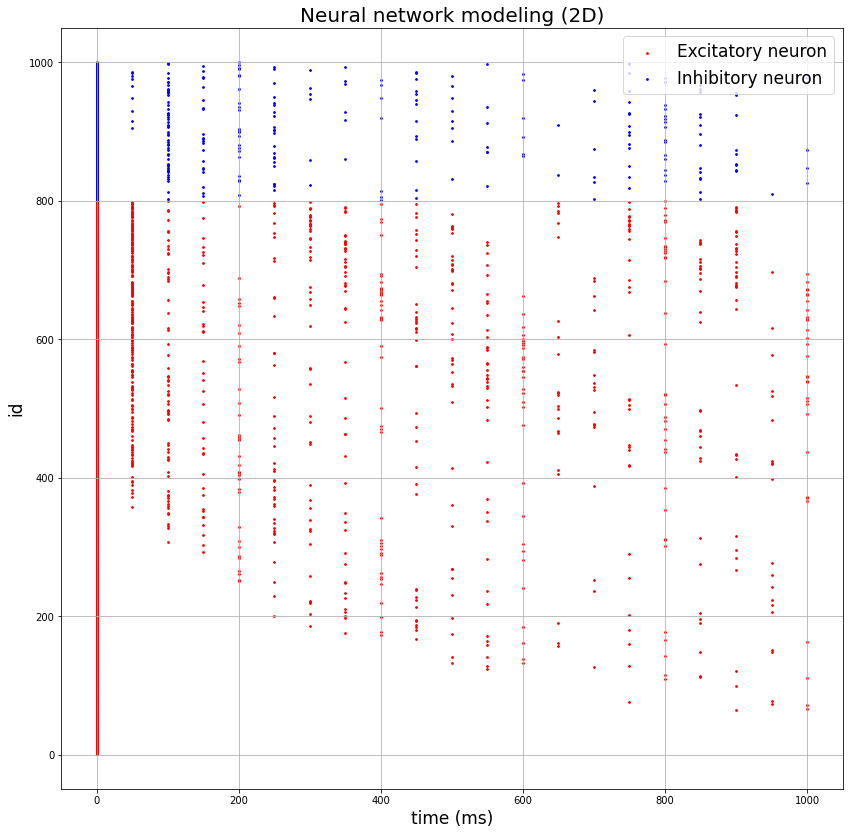

In [24]:
fig, ax = plt.subplots(figsize=(14,14))
ax.set_xlabel('time (ms)', fontsize = 17)
ax.set_ylabel('id', fontsize = 17)
t_1 = np.linspace(0, 1000, 21)
print(t_1)
t_0_1 = 0
t_n_1 = 1
h1 = (t_n_1-t_0_1)/(len(t_1)-1)
I = [0 for c  in range (len(t_1))]
increased_current = np.zeros((len(t_1), 1000))
for i in range (0, 1000):
    a = params_neurons[i]['a']
    b = params_neurons[i]['b']
    c = params_neurons[i]['c']
    d = params_neurons[i]['d']
    for k in range (len(t_1)):
      if increased_current[k][i] == 0:
        I[k]  = params_neurons[i]['I']
      else:
        I[k] = increased_current[k][i]
    id = params_neurons[i]['id']
    v = mod_euler(t_0_1, t_n_1, [f1, f2], h1, I)
    for p in range (len(v)):
      if v[p] == c:
        for j in range (1000):
          increased_current[p][j] += params_neurons[j]['I'] +  W_matrix[j][i]
        if (i+1 <= 800):
          _ = ax.scatter(t_1[p], i+1, color = 'red', s = 3)
        else: 
          __ = ax.scatter(t_1[p], i+1, color = 'blue', s = 3)

_.set_label('Excitatory neuron')
__.set_label('Inhibitory neuron')
ax.set_title("Neural network modeling (2D)", loc='center', fontsize = 20)
plt.legend(fontsize = 17, loc='upper right') 
plt.grid()
plt.show()



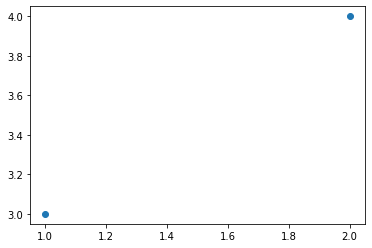

In [ ]:
plt.scatter([1,2], [3,4])